In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('data/Socioeconomic Data/Socioeconomic determinants/socioeconomic determinant for state.csv')
df_2 = pd.read_csv('data/csse_covid_19_daily_reports_us/02-15-2021.csv')

In [4]:
df.head()

,FIPS,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052


In [5]:
df_2

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-02-16 05:31:00,32.3182,-86.9023,481605,9244,264621.0,207740.0,1.0,9822.288982,2231641.0,NaN,1.919415,84000001.0,USA,45514.109706,NaN
1,Alaska,US,2021-02-16 05:31:00,61.3707,-152.4044,56405,282,NaN,56123.0,2.0,7710.393756,1584548.0,NaN,0.499956,84000002.0,USA,216602.943086,NaN
2,American Samoa,US,2021-02-16 05:31:00,-14.2710,-170.1320,0,0,NaN,0.0,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-02-16 05:31:00,33.7298,-111.4312,798608,14978,112062.0,671568.0,4.0,10971.823743,3636676.0,NaN,1.875513,84000004.0,USA,49963.145978,NaN
4,Arkansas,US,2021-02-16 05:31:00,34.9697,-92.3731,313348,5275,297552.0,10521.0,5.0,10383.311839,2587306.0,NaN,1.683432,84000005.0,USA,85734.726311,NaN
5,California,US,2021-02-16 08:31:10,36.1162,-119.6816,3491392,47119,NaN,3444273.0,6.0,8836.232778,45964127.0,NaN,1.349576,84000006.0,USA,116328.881319,NaN
6,Colorado,US,2021-02-16 05:31:00,39.0598,-105.3111,414369,5826,21970.0,386573.0,8.0,7195.485259,5861313.0,NaN,1.405993,84000008.0,USA,101781.241578,NaN
7,Connecticut,US,2021-02-16 05:31:00,41.5978,-72.7554,270242,7447,9800.0,252995.0,9.0,7579.810545,6312225.0,NaN,2.755678,84000009.0,USA,177046.756685,NaN
8,Delaware,US,2021-02-16 05:31:00,39.3185,-75.5071,83239,1283,NaN,81956.0,10.0,8548.169782,1323091.0,NaN,1.541345,84000010.0,USA,135873.887307,NaN
9,Diamond Princess,US,2021-02-16 05:31:00,NaN,NaN,49,0,NaN,49.0,88888.0,NaN,NaN,NaN,0.000000,84088888.0,USA,NaN,NaN


In [6]:
dmf=df.merge(df_2, left_on='Name', right_on='Province_State')
dmf.drop(columns = ['People_Hospitalized', 'Hospitalization_Rate'], inplace=True)
dmf['Recovered'] = dmf['Confirmed'] - dmf['Deaths'] - dmf['Active']
dmf['deaths_per_population'] = dmf['Deaths'] / dmf['Population size']
dmf['recovered_per_population'] = dmf['Recovered'] / dmf['Population size']
dmf['confirmed_per_population'] = dmf['Confirmed'] / dmf['Population size']
dmf['active_per_population'] = dmf['Active'] / dmf['Population size']
dmf.head()


,FIPS_x,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS_y,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,deaths_per_population,recovered_per_population,confirmed_per_population,active_per_population
0,1,Alabama,AL,135767,4903185,36.114704,17.4,18.3,48.3,69.5,27.8,4.5,81.9,12.9,16.3,51734,15.5,9.7,2.60,68.8,119,18611,1637,383,85746,43429,Alabama,US,2021-02-16 05:31:00,32.3182,-86.9023,481605,9244,264621.0,207740.0,1.0,9822.288982,2231641.0,1.919415,84000001.0,USA,45514.109706,0.001885,0.053969,0.098223,0.042368
1,2,Alaska,AK,1723337,731545,0.424493,12.4,21.0,52.0,71.4,4.7,7.2,88.0,6.4,18.5,75463,10.1,12.2,2.90,64.7,28,1832,193,41,15487,18418,Alaska,US,2021-02-16 05:31:00,61.3707,-152.4044,56405,282,0.0,56123.0,2.0,7710.393756,1584548.0,0.499956,84000002.0,USA,216602.943086,0.000385,0.000000,0.077104,0.076718
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130,Arizona,US,2021-02-16 05:31:00,33.7298,-111.4312,798608,14978,112062.0,671568.0,4.0,10971.823743,3636676.0,1.875513,84000004.0,USA,49963.145978,0.002058,0.015396,0.109718,0.092265
3,5,Arkansas,AR,137732,3017804,21.910696,17.4,19.2,48.9,79.3,16.7,7.7,80.1,12.5,15.1,48952,16.2,9.1,2.59,65.5,105,12473,914,261,42487,47343,Arkansas,US,2021-02-16 05:31:00,34.9697,-92.3731,313348,5275,297552.0,10521.0,5.0,10383.311839,2587306.0,1.683432,84000005.0,USA,85734.726311,0.001748,0.098599,0.103833,0.003486
4,6,California,CA,423967,39512223,93.196459,14.8,18.7,49.7,63.6,7.0,39.4,90.0,16.0,21.9,80440,11.8,7.7,3.02,54.9,461,80893,8652,1986,444964,588052,California,US,2021-02-16 08:31:10,36.1162,-119.6816,3491392,47119,0.0,3444273.0,6.0,8836.232778,45964127.0,1.349576,84000006.0,USA,116328.881319,0.001193,0.000000,0.088362,0.087170


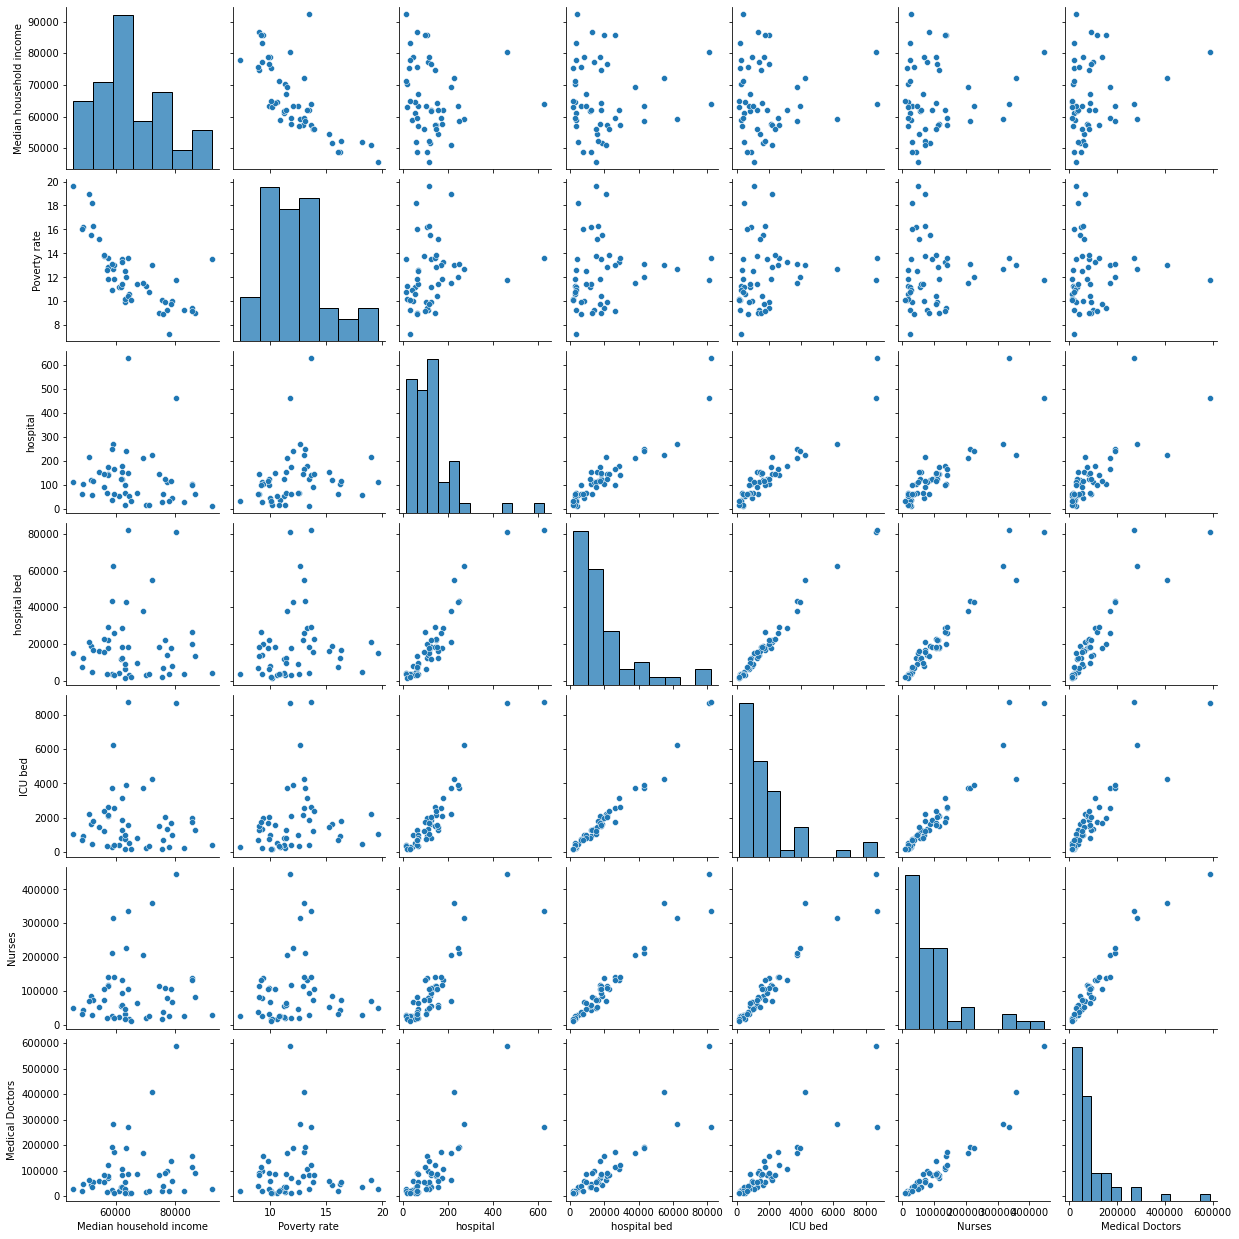

In [117]:
sns.pairplot(dmf[[ 'Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'Nurses',
       'Medical Doctors']])

In [ ]:
sns.pairplot(dmf[[ 'Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors', 'White Population', 'Africa-American Population',
       'Hispanic population']])

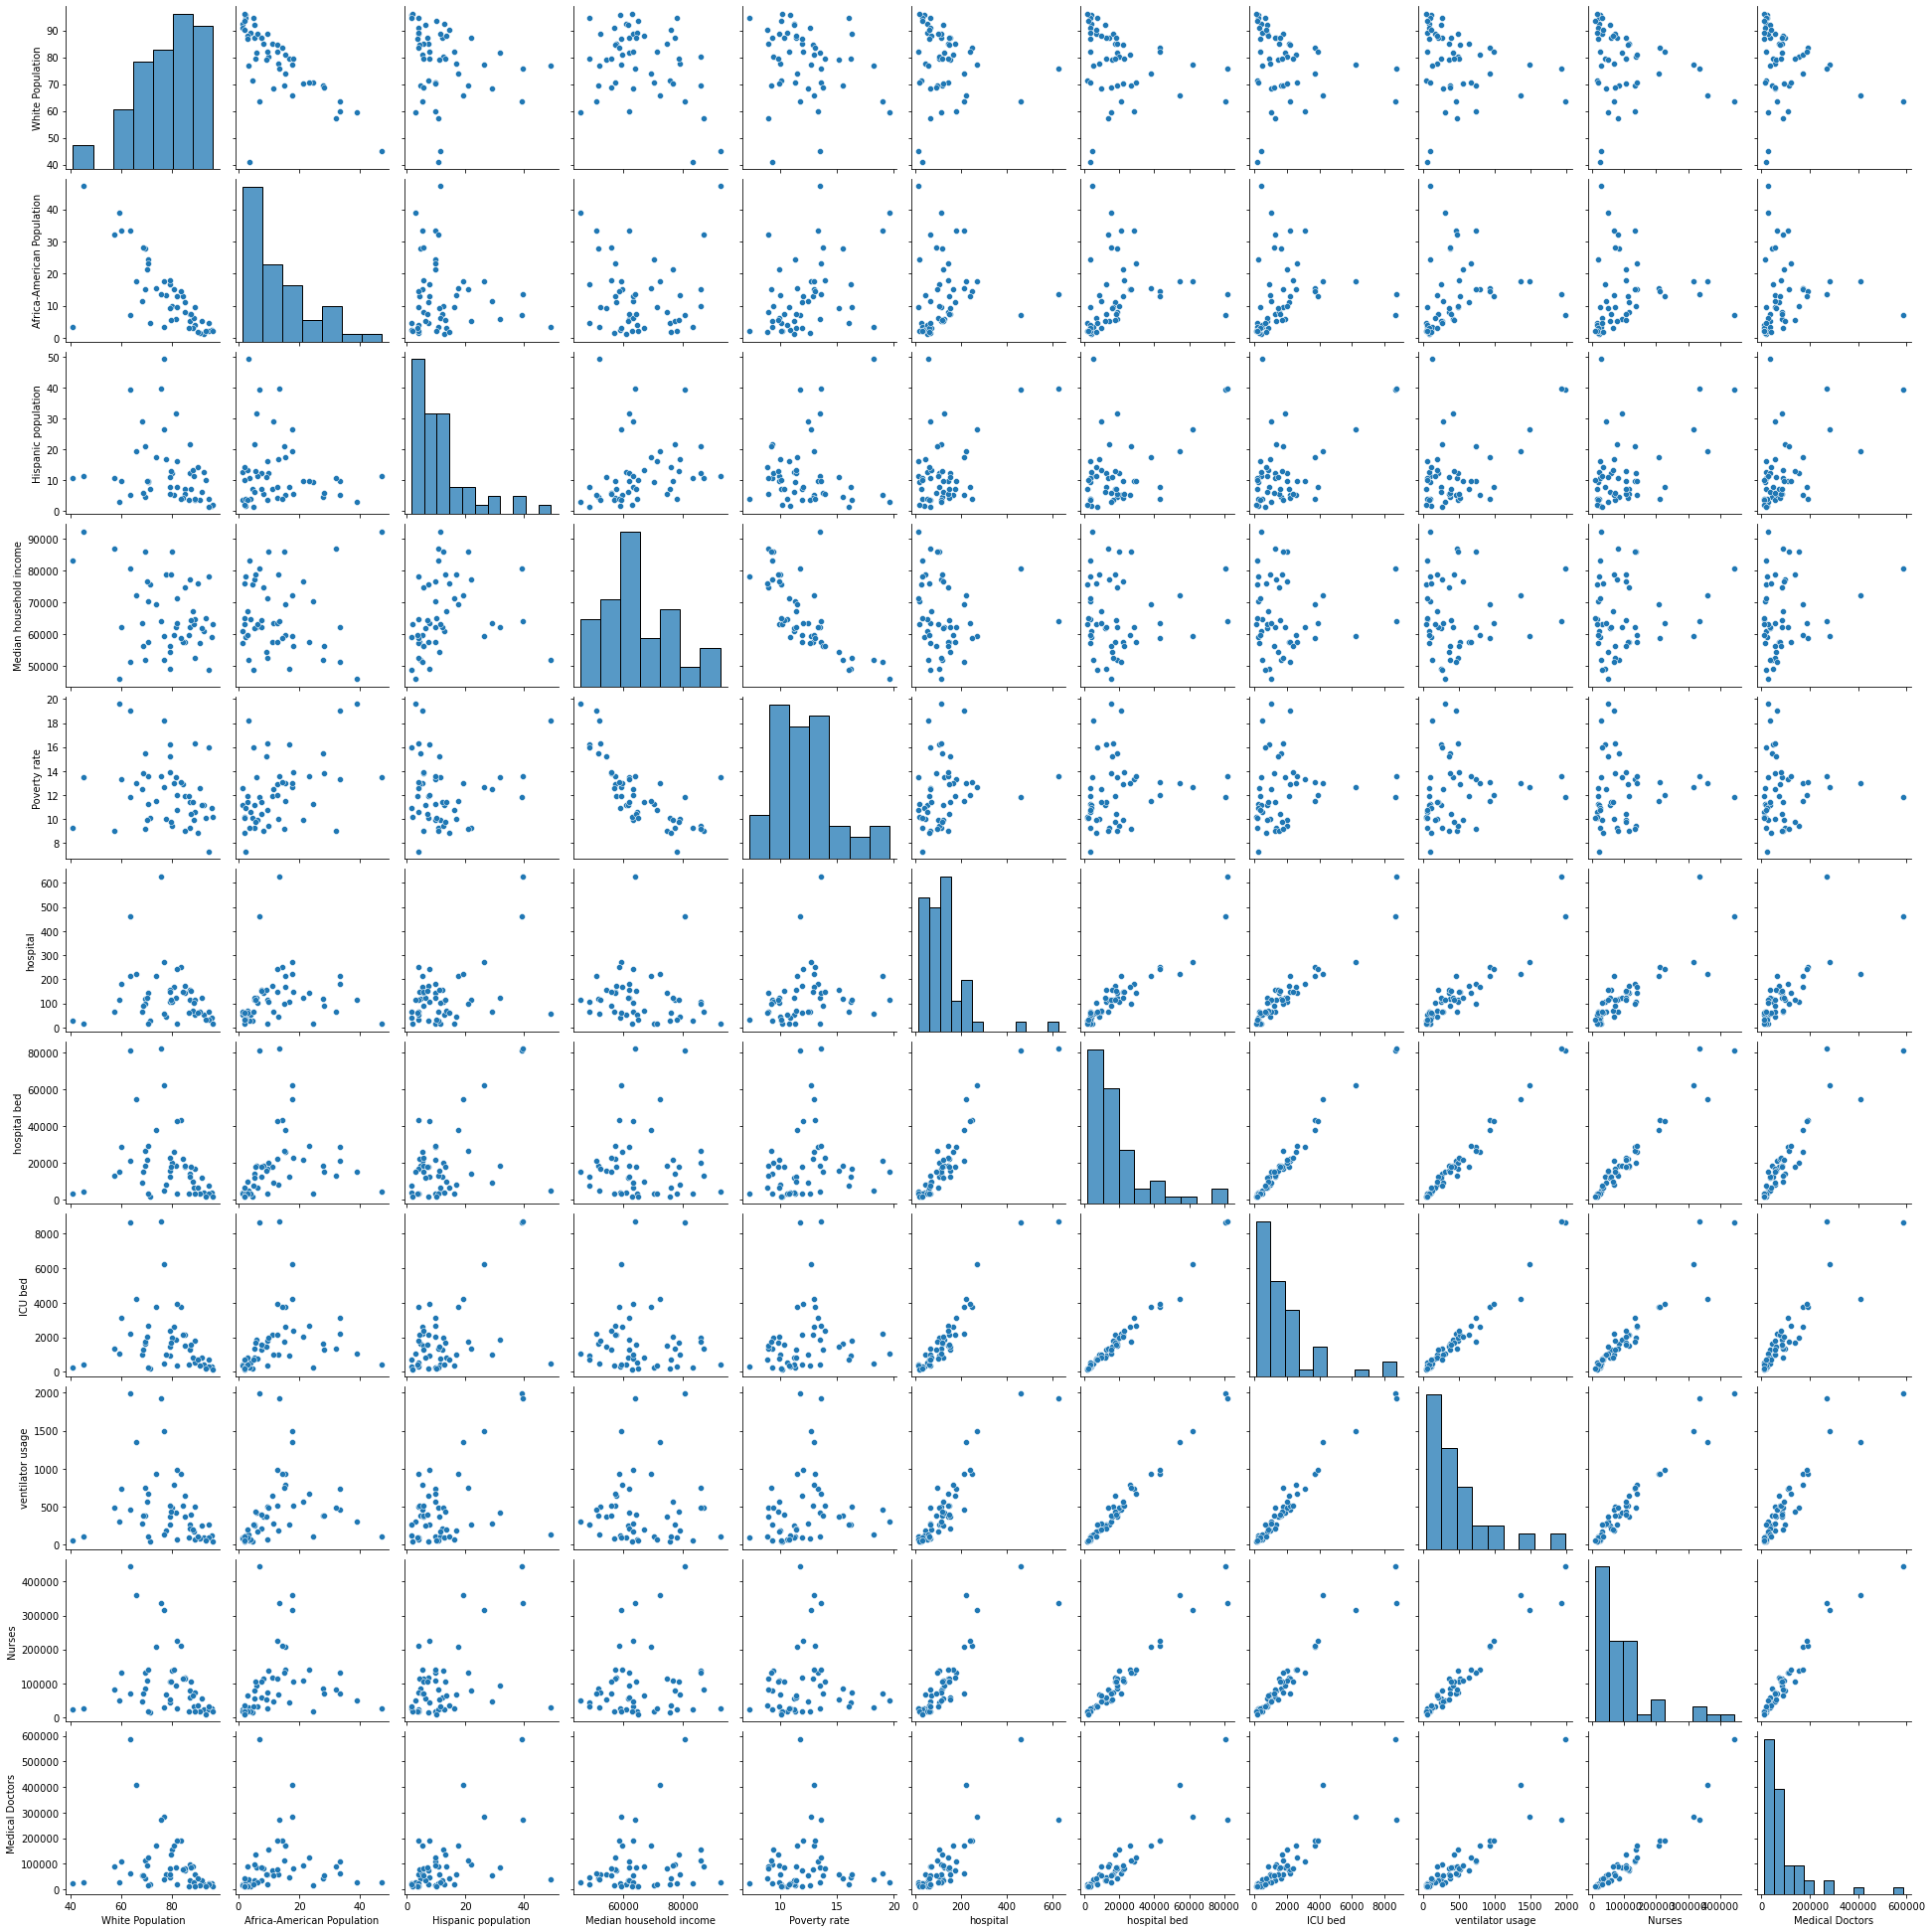

In [145]:
sns.pairplot(dmf[[ 'White Population', 'Africa-American Population',
       'Hispanic population', 'Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'ventilator usage', 'Nurses',
       'Medical Doctors']])

In [8]:
#scaling
X = dmf[[ 'White Population', 'Africa-American Population',
       'Hispanic population', 'deaths_per_population']]
ss=StandardScaler()
X_sc = ss.fit_transform(X)

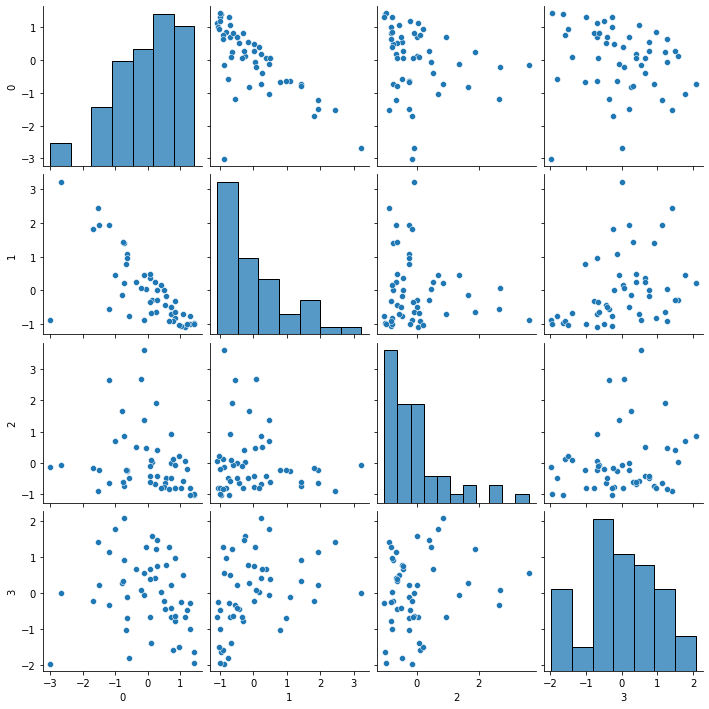

In [9]:
#scaling
sns.pairplot(pd.DataFrame(X_sc))

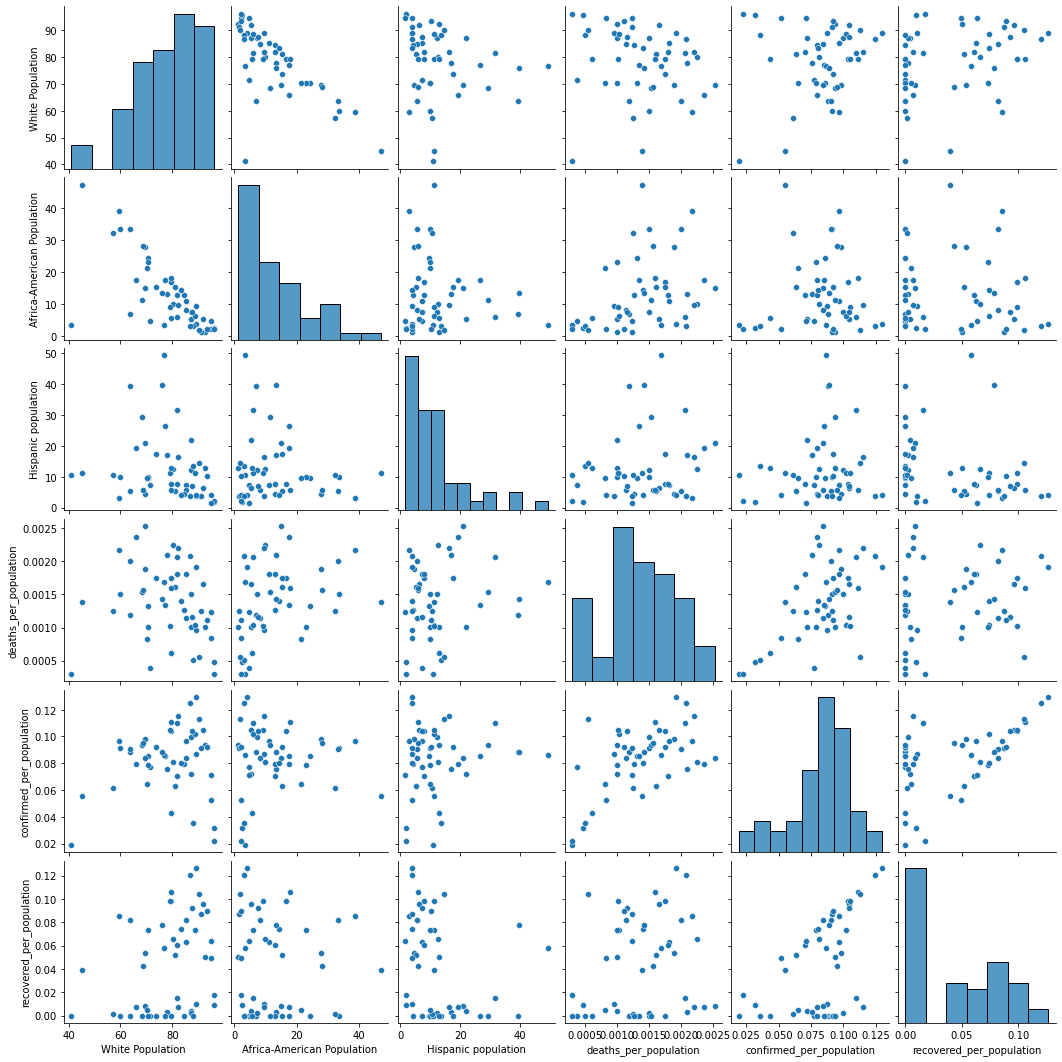

In [220]:
sns.pairplot(dmf[[ 'White Population', 'Africa-American Population',
       'Hispanic population', 'deaths_per_population', 'confirmed_per_population', 'recovered_per_population']])

In [ ]:
dmf.columns

In [ ]:
sns.pairplot(dmf[['Name', 'Population size','Hispanic population', 'Internet access', 'High school degree',
       'Bachelor degrees', 'Median household income', 'Poverty rate',
        'Confirmed', 'Deaths', 'Recovered', 'Active']]);

In [ ]:
sns.pairplot(dmf[['Name', 'Population size',
       'Population density', 'Senior Population', 'Young Population',
       'Male Population', 'White Population', 'Africa-American Population',
        'Confirmed', 'Deaths', 'Recovered', 'Active']])

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['confirmed_per_population']].sort_values('confirmed_per_population', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

<AxesSubplot:>

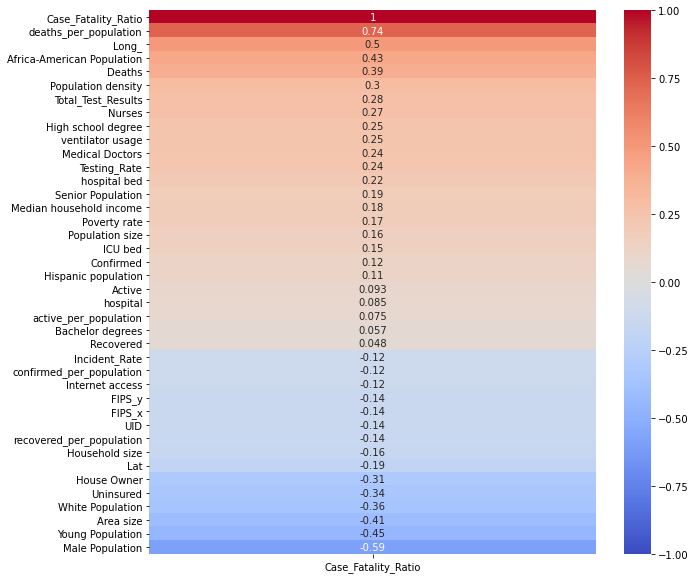

In [159]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['Case_Fatality_Ratio']].sort_values('Case_Fatality_Ratio', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

<AxesSubplot:>

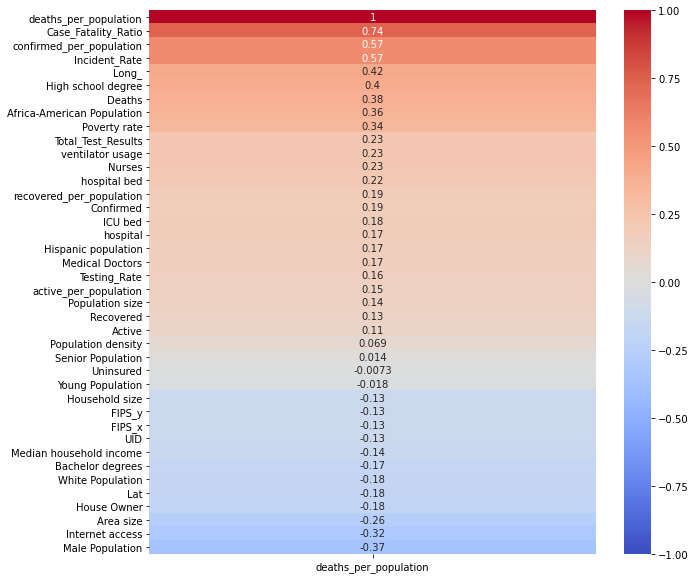

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['deaths_per_population']].sort_values('deaths_per_population', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

<AxesSubplot:>

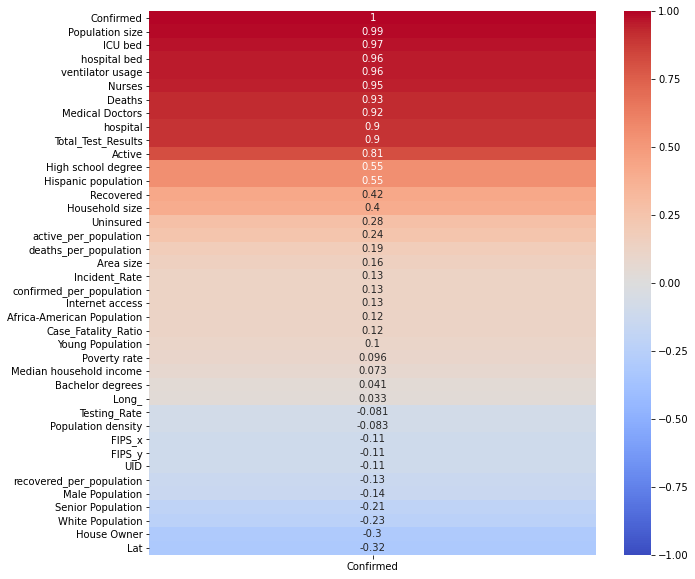

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['Confirmed']].sort_values('Confirmed', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

<AxesSubplot:>

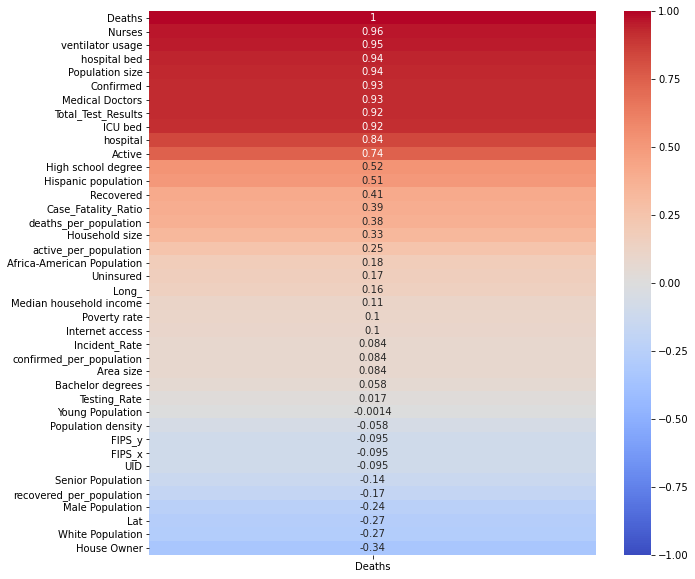

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(dmf.corr()[['Deaths']].sort_values('Deaths', ascending = False),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)

In [178]:
features = ['Population size', 'White Population', 'Africa-American Population',
       'Hispanic population']
X = dmf[features]
y = dmf['Deaths']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [180]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [177]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
print(lr.score(X_train_sc, y_train))
print(lr.score(X_test_sc, y_test))

0.9234942239168581
0.773077554730576


In [181]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
print(lr.score(X_train_sc, y_train))
print(lr.score(X_test_sc, y_test))

0.9352855498756537
0.768585193545517


In [15]:
lr.coef_

array([   501.22385899,   1269.08485563,    425.41875753, -10741.09720287,
         8352.32986954,  11042.00997349,   -614.17982855,    252.85213158,
          392.24897416,    523.85824626])

In [ ]:
y_test

In [ ]:
y_train

In [140]:
features = ['Case_Fatality_Ratio','Median household income', 'Poverty rate', 'White Population', 'Africa-American Population',
       'Hispanic population']
X = dmf[features]
y = dmf['deaths_per_population']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [141]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
print(lr.score(X_train_sc, y_train))
print(lr.score(X_test_sc, y_test))

0.5890434814591013
0.7029277564514895


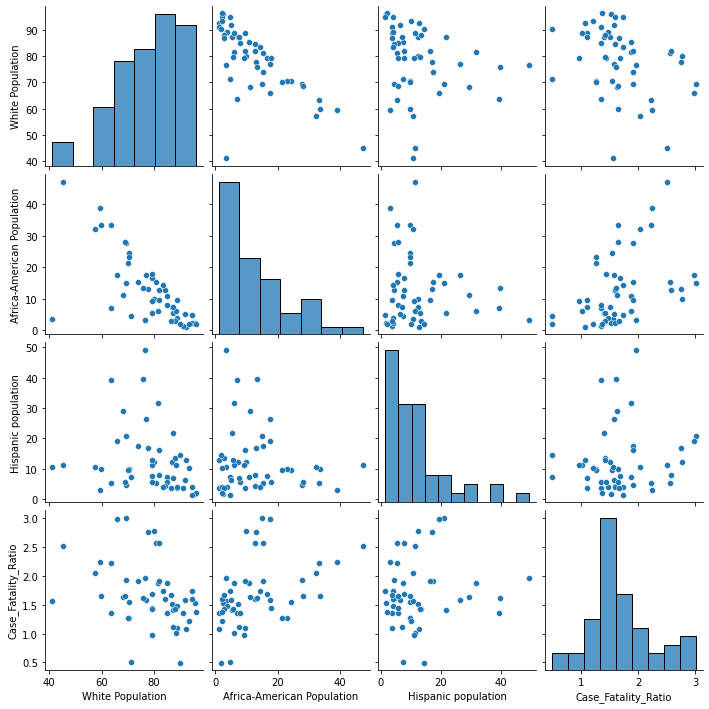

In [135]:
sns.pairplot(dmf[[ 'White Population', 'Africa-American Population',
       'Hispanic population', 'Case_Fatality_Ratio']])

In [143]:
dmf.sort_values('deaths_per_population', ascending = False)

,FIPS_x,Name,Postal Code,Area size,Population size,Population density,Senior Population,Young Population,Male Population,White Population,Africa-American Population,Hispanic population,Internet access,High school degree,Bachelor degrees,Median household income,Poverty rate,Uninsured,Household size,House Owner,hospital,hospital bed,ICU bed,ventilator usage,Nurses,Medical Doctors,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS_y,Incident_Rate,Total_Test_Results,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,deaths_per_population,recovered_per_population,confirmed_per_population,active_per_population
30,34,New Jersey,NJ,22591,8882190,393.173830,16.6,18.0,48.9,69.5,15.1,20.9,89.5,9.7,25.1,85751,9.2,7.9,2.77,63.3,98,26385,1758,745,133029,113962,New Jersey,US,2021-02-16 05:31:00,40.2989,-74.5210,747432,22466,72336.0,652630.0,34.0,8414.951718,10081147.0,3.005758,84000034.0,USA,113498.439011,0.002529,0.008144,0.084150,0.073476
32,36,New York,NY,141297,19453561,137.678514,16.9,17.2,48.6,65.8,17.6,19.3,86.5,12.4,21.2,72108,13.0,5.2,2.71,53.5,224,54743,4230,1357,358901,407769,New York,US,2021-02-16 05:31:00,42.1657,-74.9481,1546408,46000,138542.0,1361866.0,36.0,7949.228421,35217456.0,2.974635,84000036.0,USA,181033.467343,0.002365,0.007122,0.079492,0.070006
21,25,Massachusetts,MA,27336,6892503,252.140145,17.0,16.1,48.5,80.2,9.9,12.4,89.1,8.7,24.7,85843,9.4,3.0,2.68,62.2,105,20056,1986,492,138481,155292,Massachusetts,US,2021-02-16 05:31:00,42.2302,-71.5301,559350,15517,453740.0,90093.0,25.0,8115.339232,15011405.0,2.774113,84000025.0,USA,217793.231283,0.002251,0.065831,0.081153,0.013071
39,44,Rhode Island,RI,4001,1059361,264.774056,17.7,15.7,48.8,82.0,9.6,16.3,87.8,10.7,20.9,71169,10.8,4.1,2.69,61.7,15,3413,375,64,25014,18028,Rhode Island,US,2021-02-16 05:31:00,41.6809,-71.5118,121787,2334,7591.0,111862.0,44.0,11496.269921,2780439.0,1.916461,84000044.0,USA,262463.787132,0.002203,0.007166,0.114963,0.105594
24,28,Mississippi,MS,125438,2976149,23.726056,16.4,19.5,48.2,59.4,38.9,3.0,77.0,14.7,13.7,45792,19.6,13.0,2.67,67.3,114,15148,1069,307,50103,28705,Mississippi,US,2021-02-16 05:31:00,32.7416,-89.6787,287980,6464,253140.0,28376.0,28.0,9676.262848,1681363.0,2.244600,84000028.0,USA,56494.584109,0.002172,0.085056,0.096763,0.009534
6,9,Connecticut,CT,14357,3565287,248.330919,17.6,16.6,48.9,77.8,13.2,16.9,88.8,9.3,22.0,78833,10.0,5.9,2.65,65.0,46,8123,966,193,67924,58009,Connecticut,US,2021-02-16 05:31:00,41.5978,-72.7554,270242,7447,9800.0,252995.0,9.0,7579.810545,6312225.0,2.755678,84000009.0,USA,177046.756685,0.002089,0.002749,0.075798,0.070961
41,46,South Dakota,SD,199729,884659,4.429297,17.4,20.5,50.8,86.7,3.0,3.7,85.2,7.9,20.6,59533,11.9,10.2,2.54,67.8,63,3232,392,90,18473,11874,South Dakota,US,2021-02-16 05:31:00,44.2998,-99.4388,110315,1844,106440.0,2031.0,46.0,12469.776490,413784.0,1.671577,84000046.0,USA,46773.276483,0.002084,0.120318,0.124698,0.002296
2,4,Arizona,AZ,295234,7278717,24.654061,18.0,18.7,49.7,81.7,6.0,31.7,87.4,12.4,18.8,62055,13.5,11.3,2.71,65.3,125,18388,1882,427,93928,84130,Arizona,US,2021-02-16 05:31:00,33.7298,-111.4312,798608,14978,112062.0,671568.0,4.0,10971.823743,3636676.0,1.875513,84000004.0,USA,49963.145978,0.002058,0.015396,0.109718,0.092265
18,22,Louisiana,LA,135659,4648794,34.268231,16.0,19.5,48.8,63.5,33.4,5.4,80.7,14.0,16.0,51073,19.0,8.9,2.67,66.5,215,21055,2212,463,69699,63967,Louisiana,US,2021-02-16 05:31:00,31.1695,-91.8678,420394,9325,380673.0,30396.0,22.0,9043.076548,5345798.0,2.218157,84000022.0,USA,114993.221898,0.002006,0.081886,0.090431,0.006538
34,38,North Dakota,ND,183108,762062,4.161817,15.8,19.6,51.0,89.0,3.9,4.0,84.4,6.5,21.5,64577,10.6,6.9,2.49,61.3,53,3317,516,66,16046,12751,North Dakota,US,2021-02-16 05:31:00,47.5289,-99.7840,98643,1461,96445.0,737.0,38.0,12944.222386,1379342.0,1.481099,84000038.0,USA,181001.283360,0.001917,0.126558,0.129442,0.000967


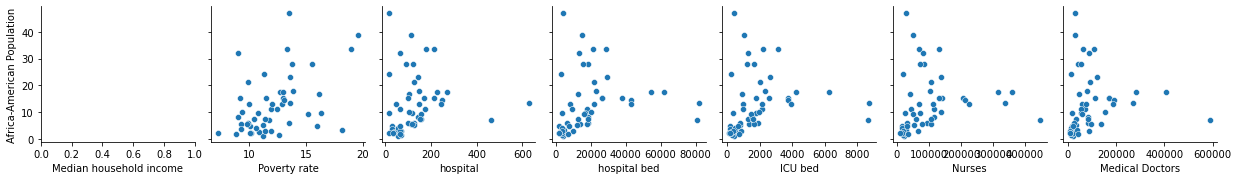

In [149]:
sns.pairplot(data=dmf,
                  y_vars=['Africa-American Population'],
                  x_vars=['Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'Nurses',
       'Medical Doctors'])

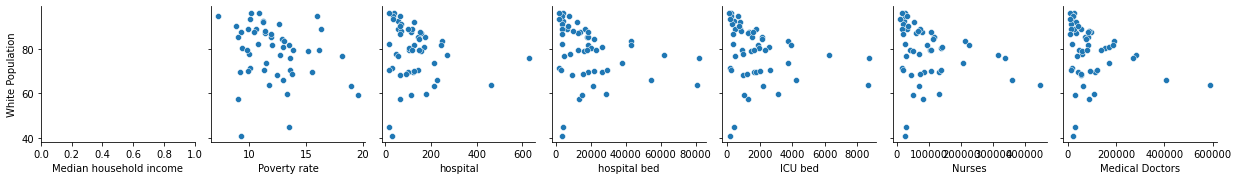

In [150]:
sns.pairplot(data=dmf,
                  y_vars=['White Population'],
                  x_vars=['Median household income', 'Poverty rate', 'hospital',
       'hospital bed', 'ICU bed', 'Nurses',
       'Medical Doctors'])

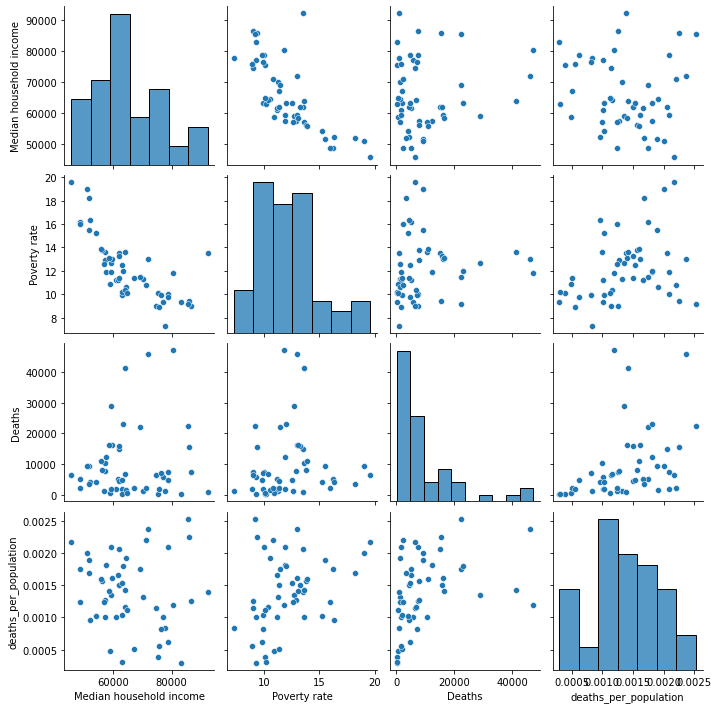

In [151]:
sns.pairplot(dmf[[ 'Median household income', 'Poverty rate', 'Deaths', 'deaths_per_population']])

In [221]:
dmf['Case_Fatality_Ratio'].sort_values(ascending=False)

30    3.005758
32    2.974635
21    2.774113
6     2.755678
38    2.568953
22    2.558660
8     2.512756
24    2.244600
18    2.218157
20    2.039252
31    1.957281
0     1.919415
39    1.916461
13    1.904993
14    1.876543
2     1.875513
35    1.741699
48    1.729625
3     1.683432
41    1.671577
10    1.647485
40    1.642884
28    1.634694
43    1.609630
29    1.598209
25    1.593973
15    1.588288
9     1.580240
11    1.568903
7     1.541345
19    1.520725
16    1.507791
34    1.481099
42    1.441809
47    1.425101
37    1.420273
5     1.405993
45    1.370654
26    1.361507
23    1.359431
4     1.349576
33    1.273849
46    1.272079
50    1.217630
49    1.110692
17    1.101609
12    1.076527
27    1.015061
36    0.975446
1     0.499956
44    0.496467
Name: Case_Fatality_Ratio, dtype: float64